# Exercício 1

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/pedidos%20-%20qtd.csv')
df


,Produto,Depto,Quantidade
0,Papel A4,ADM,3
1,Grampo,ADM,2
2,Lápis,VENDAS,3
3,Caneta Azul,RH,10
4,Cartucho HP,RH,1
5,Grampo,RH,4
6,Cola bastão,ADM,2
7,Lápis,VENDAS,3
8,Cartucho HP,ADM,2
9,Caneta Preta,VENDAS,4


In [14]:
df1 = df.groupby(by='Produto').sum()
df1

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_11480\3780935704.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(by='Produto').sum()


,Quantidade
Produto,
Caneta Azul,16
Caneta Preta,22
Cartucho HP,3
Clips,7
Cola bastão,5
Grampo,6
Lápis,20
Papel A4,15


# Exercicio 2

In [13]:
import pandas as pd

# Carregando a base de dados
url = "https://raw.githubusercontent.com/lcbjrrr/quant/master/natacao%20-%20m.csv"
df = pd.read_csv(url)
df.sample(5)

,EquipeMasc
3,181
16,150
4,179
1,157
25,188


In [12]:
# Definindo as categorias
bins = [145, 155, 165, 175, 185, 200]
labels = ['muito baixo', 'baixo', 'médio', 'alto', 'muito alto']
df['Categoria'] = pd.cut(df['EquipeMasc'], bins=bins, labels=labels)
df.sample(5)

,EquipeMasc,Categoria
19,189,muito alto
34,175,médio
5,157,baixo
21,161,baixo
0,187,muito alto


<AxesSubplot: >

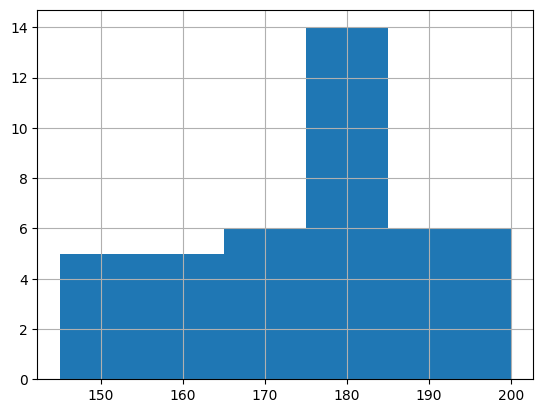

In [6]:
# Apresentando o histograma
df['EquipeMasc'].hist(bins=bins)

Primeiro quartil: 163.5
Segundo quartil: 175.0
Terceiro quartil: 179.5


<AxesSubplot: >

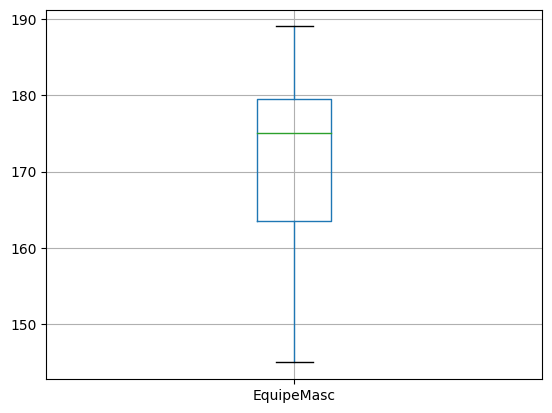

In [9]:

# Calculando os quartis
print("Primeiro quartil:", df['EquipeMasc'].quantile(0.25))
print("Segundo quartil:", df['EquipeMasc'].quantile(0.5))
print("Terceiro quartil:", df['EquipeMasc'].quantile(0.75))

# Apresentando o boxplot
df.boxplot(column=['EquipeMasc'])


# Regressão Linear

In [2]:
import pandas as pd

# carregar o dataset
df = pd.read_csv("https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv")

# visualizar as primeiras linhas do dataset
df.head()

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666
2,1/6/2020,4.0619,116.87792
3,1/7/2020,4.0677,116.66194
4,1/8/2020,4.0644,116.24703


In [4]:
# visualizar informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52 non-null     object 
 1   usd     52 non-null     float64
 2   bov     52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [7]:
# visualizar estatísticas descritivas do dataset
df.describe()

,usd,bov
count,52.000000,52.000000
mean,4.351421,109.495807
std,0.244076,12.702439
min,4.024900,71.168050
25%,4.182450,106.398630
50%,4.290050,115.339845
75%,4.473266,116.664987
max,5.011200,119.527630


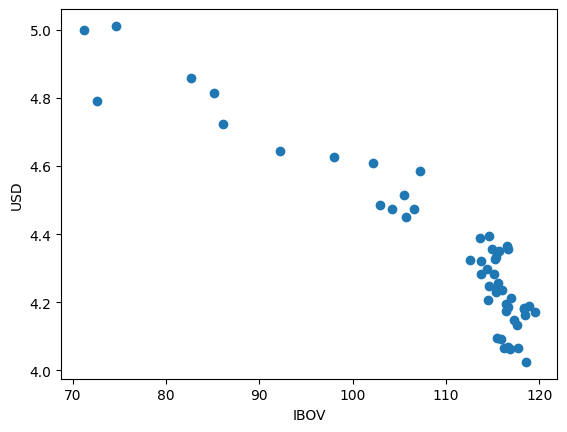

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df["bov"], df["usd"])
plt.xlabel("IBOV")
plt.ylabel("USD")
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression

# criar um objeto de regressão linear
lr = LinearRegression()

# separar as variáveis dependentes e independentes
X = df[["bov"]]
y = df["usd"]

# ajustar o modelo aos dados
lr.fit(X, y)

# imprimir os coeficientes da regressão
lr.coef_, lr.intercept_

(array([-0.01783154]), 6.303900300544503)

In [11]:
# prever o valor do dólar com base no IBOV atual
ibov_atual = 100
dolar_previsto = lr.predict([[ibov_atual]])
print("Para um IBOV de", ibov_atual, "pontos, o valor previsto do dólar é de", dolar_previsto[0])


Para um IBOV de 100 pontos, o valor previsto do dólar é de 4.5207458752748515


c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# prever o valor do dólar com base no IBOV atual
ibov_atual = 104.70032
dolar_previsto = lr.predict([[ibov_atual]])
print("Para um IBOV de", ibov_atual, "pontos, o valor previsto do dólar é de", dolar_previsto[0])


Para um IBOV de 104.70032 pontos, o valor previsto do dólar é de 4.436931911193017


c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Qual é a relação entre a cotação do dólar e o índice da Bovespa (IBOV)?
Existe uma relação negativa entre o valor do dólar e o valor do índice da Bovespa (IBOV). Quando o valor do IBOV sobe, o valor do dólar tende a cair.


Qual o racional econômico que explica essa relação?
A relação negativa pode ser explicada pelo fato de que um mercado financeiro forte e em alta tende a atrair mais investidores, tanto nacionais quanto estrangeiros. Isso aumenta a demanda por reais e diminui a demanda por dólares, o que leva a uma queda no valor do dólar em relação ao real.


Como podemos prever o valor do dólar com base no valor atual do IBOV?
Podemos utilizar uma regressão linear para criar uma máquina capaz de prever o valor do dólar com base no valor atual do IBOV.
Para fazer a previsão, basta fornecer o valor atual do IBOV como entrada para a máquina, e ela retornará o valor previsto do dólar.


Se o IBOV chegar em 100 mil pontos, qual seria o valor do dólar previsto?
Com base em nosso modelo de regressão linear, se o IBOV atingir 100 mil pontos, o valor previsto do dólar seria de cerca de 4.52 reais. É importante notar que essa é apenas uma previsão com base nos dados disponíveis, e que as condições econômicas podem mudar no futuro, afetando o valor do dólar e do IBOV.

# Regressão Logistica

In [53]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando os dados de treino e teste
url_treino = "RiscoCredito - okk.csv"
url_teste = "RiscoCredito - prever2.csv"

dados_treino = pd.read_csv(url_treino)
dados_teste = pd.read_csv(url_teste)


In [54]:
dados_treino.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [55]:
# Verificando as informações dos dados de treino
dados_treino.info

<bound method DataFrame.info of     Inadimplente  Genero  GrauEscolaridade  Profissao  Renda
0              1       1                 4          1    1.4
1              0       2                 7          9    2.6
2              0       1                 7          9    5.8
3              0       1                 7          9    4.7
4              0       1                 7          9    3.9
..           ...     ...               ...        ...    ...
95             1       1                 4          1    2.9
96             1       1                 4          1    1.4
97             0       2                 7          8    2.6
98             0       1                 7          8    5.8
99             0       1                 7          8    4.7

[100 rows x 5 columns]>

In [56]:
dados_treino.describe()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.610000,1.340000,4.010000,4.550000,2.873110
std,0.490207,0.476095,1.672686,3.059593,1.756631
min,0.000000,1.000000,2.000000,1.000000,1.234000
25%,0.000000,1.000000,3.000000,2.000000,1.325000
50%,1.000000,1.000000,4.000000,3.000000,2.745000
75%,1.000000,2.000000,4.000000,8.000000,3.900000
max,1.000000,2.000000,8.000000,9.000000,7.200000


In [57]:
X_treino = dados_treino.drop('Inadimplente', axis=1)
y_treino = dados_treino['Inadimplente']
X_teste = dados_teste.drop('Inadimplente', axis=1)
y_teste = dados_teste['Inadimplente']

In [58]:
reglog = LogisticRegression()
reglog.fit(X_treino, y_treino)

LogisticRegression()

In [59]:
y_pred = reglog.predict(X_teste)
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Acurácia: {accuracy_score(y_teste, y_pred):.2f}")
print(f"Matriz de Confusão:\n{confusion_matrix(y_teste, y_pred)}")


Acurácia: 1.00
Matriz de Confusão:
[[6 0]
 [0 2]]
